In [131]:
import pandas as pd

In [132]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [133]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [134]:
'''Will only return True when we have Brazil in the location, so theres no need to dropna'''
def brazil_in_location(location):
    return (type(location) is str and 'Brazil' in location)

In [135]:
one_hot_encoding_locations = [brazil_in_location(location) for location in df.Location.values]
brazilian_df = df[one_hot_encoding_locations]
len(brazilian_df)

191

In [136]:
df_crashes = brazilian_df[['Date', 'Location', 'Summary', 'Operator', 'Type']].copy()
df_crashes.fillna('Unknown', inplace=True)
df_crashes.head()

,Date,Location,Summary,Operator,Type
138,03/03/1928,"Rio de Janeiro, Brazil",Unknown,Unknown,Unknown
163,12/03/1928,Brazil,The seaplane took off form the bay and narrowl...,Syndicato Condor,Dornier Wal
164,12/04/1928,"Rio de Janeiro, Brazil",The aircraft's wingtip struck the water and cr...,Unknown,Junkers G24
227,11/07/1930,"Off of Santos, Brazil",Crashed into the sea.,Syndicato Condor,Junkers G-24
252,10/14/1931,Brazil,Unknown,Syndicato Condor,Dornier Wal


In [137]:
# df_crashes.Location.replace(['Off', 'of ', 'the ', 'Macaé', 'Near'], '', regex=True, inplace=True)
# df_crashes.Location.replace(['Belelm', 'Humiata', 'Janerio', 'Florianpolis'], ['Belem', 'Humaita', 'Janeiro', 'Florianopolis'], regex=True)

In [138]:
df_crashes['Location_State'] = [
    'Rio de Janeiro',
    'Unknown',
    'Rio de Janeiro',
    'Sao Paulo',
    'Unknown',
    'Espirito Santo',
    'Bahia',
    'Bahia',
    'Sao Paulo',
    'Unknown',
    'Rio de Janeiro',
    'Rio de Janeiro',
    'Rio de Janeiro',
    'Sao Paulo',
    'Unknown',
    'Rio de Janeiro',
    'Rio Grande do Sul',
    'Sao Paulo',
    'Espirito Santo',
    'Minas Gerais',
    'Espirito Santo',
    'Rio de Janeiro',
    'Sao Paulo',
    'Para',
    'Minas Gerais',
    'Para',
    'Bahia',
    'Rio Grande do Sul',
    'Santa Catarina',
    'Rio Grande do Sul',
    'Unknown',
    'Minas Gerais',
    'Bahia',
    'Rio Grande do Sul',
    'Parana',
    'Santa Catarina',
    'Sao Paulo',
    'Rio de Janeiro',
    'Sergipe',
    'Sao Paulo',
    'Sao Paulo',
    'Sao Paulo',
    'Maranhao',
    'Sao Paulo',
    'Amazonas',
    'Rio de Janeiro',
    'Goias',
    'Rio Grande do Sul',
    'Bahia',
    'Sao Paulo',
    'Minas Gerais',
    'Sao Paulo',
    'Bahia',
    'Rio de Janeiro',
    'Bahia',
    'Espirito Santo',
    'Para',
    'Sao Paulo',
    'Amazonas',
    'Rio Grande do Sul',
    'Rio Grande do Sul',
    'Sao Paulo',
    'Para',
    'Rio de Janeiro',
    'Rio de Janeiro',
    'Parana',
    'Unknown',
    'Paraiba',
    'Rio de Janeiro',
    'Rio de Janeiro',
    'Sao Paulo',
    'Rio de Janeiro',
    'Rio de Janeiro',
    'Rio Grande do Sul',
    'Rio de Janeiro',
    'Para',
    'Rio Grande do Norte',
    'Pernambuco',
    'Sao Paulo',
    'Espirito Santo',
    'Rio de Janeiro',
    'Sao Paulo',
    'Amazonas',
    'Goias',
    'Sao Paulo',
    'Sao Paulo',
    'Rio Grande do Sul',
    'Rio de Janeiro',
    'Mato Grosso',
    'Unknown',
    'Parana',
    'Amazonas',
    'Pernambuco',
    'Pernambuco',
    'Acre',
    'Parana',
    'Para',
    'Rio de Janeiro',
    'Acre',
    'Rio de Janeiro',
    'Acre',
    'Maranhao',
    'Rio de Janeiro',
    'Para',
    'Para',
    'Rio de Janeiro',
    'Sao Paulo',
    'Tocantins',
    'Santa Catarina',
    'Pernambuco',
    'Rio Grande do Norte',
    'Amazonas',
    'Rio de Janeiro',
    'Para',
    'Sao Paulo',
    'Rio de Janeiro',
    'Mato Grosso',
    'Santa Catarina',
    'Sao Paulo',
    'Rio de Janeiro',
    'Para',
    'Goias',
    'Ceara',
    'Amazonas',
    'Acre',
    'Rio de Janeiro',
    'Sao Paulo',
    'Santa Catarina',
    'Maranhao',
    'Rio de Janeiro',
    'Mato Grosso',
    'Bahia',
    'Sao Paulo',
    'Unknown',
    'Para',
    'Pernambuco',
    'Sao Paulo',
    'Mato Grosso',
    'Sao Paulo',
    'Minas Gerais',
    'Para',
    'Pernambuco',
    'Minas Gerais',
    'Goias',
    'Pernambuco',
    'Sao Paulo',
    'Bahia',
    'Acre',
    'Sao Paulo',
    'Mato Grosso',
    'Rio Grande do Sul',
    'Pernambuco',
    'Tocantins',
    'Sao Paulo',
    'Santa Catarina',
    'Sao Paulo',
    'Para',
    'Sao Paulo',
    'Santa Catarina',
    'Amazonas',
    'Ceara',
    'Sao Paulo',
    'Para',
    'Mato Grosso',
    'Sao Paulo',
    'Parana',
    'Minas Gerais',
    'Amazonas',
    'Amapa',
    'Acre',
    'Sao Paulo',
    'Rio Grande do Sul',
    'Parana',
    'Amapa',
    'Minas Gerais',
    'Para',
    'Rio de Janeiro',
    'Amazonas',
    'Minas Gerais',
    'Rio de Janeiro',
    'Minas Gerais',
    'Rio de Janeiro',
    'Rio de Janeiro',
    'Mato Grosso',
    'Sao Paulo',
    'Sao Paulo',
    'Parana',
    'Sao Paulo',
    'Rio de Janeiro',
    'Amazonas',
    'Rio Grande do Norte'
]
df_crashes['Location_State_Acronym'] = [
    'RJ',
    '-',
    'RJ',
    'SP',
    '-',
    'ES',
    'BA',
    'BA',
    'SP',
    '-',
    'RJ',
    'RJ',
    'RJ',
    'SP',
    '-',
    'RJ',
    'RS',
    'SP',
    'ES',
    'MG',
    'ES',
    'RJ',
    'SP',
    'PA',
    'MG',
    'PA',
    'BA',
    'RS',
    'SC',
    'RS',
    '-',
    'MG',
    'BA',
    'RS',
    'PR',
    'SC',
    'SP',
    'RJ',
    'SE',
    'SP',
    'SP',
    'SP',
    'MA',
    'SP',
    'AM',
    'RJ',
    'GO',
    'RS',
    'BA',
    'SP',
    'MG',
    'SP',
    'BA',
    'RJ',
    'BA',
    'ES',
    'PA',
    'SP',
    'AM',
    'RS',
    'RS',
    'SP',
    'PA',
    'RJ',
    'RJ',
    'PR',
    '-',
    'PB',
    'RJ',
    'RJ',
    'SP',
    'RJ',
    'RJ',
    'RS',
    'RJ',
    'PA',
    'RN',
    'PE',
    'SP',
    'ES',
    'RJ',
    'SP',
    'AM',
    'GO',
    'SP',
    'SP',
    'RS',
    'RJ',
    'MT',
    '-',
    'PR',
    'AM',
    'PE',
    'PE',
    'AC',
    'PR',
    'PA',
    'RJ',
    'AC',
    'RJ',
    'AC',
    'MA',
    'RJ',
    'PA',
    'PA',
    'RJ',
    'SP',
    'TO',
    'SC',
    'PE',
    'RN',
    'AM',
    'RJ',
    'PA',
    'SP',
    'RJ',
    'MT',
    'SC',
    'SP',
    'RJ',
    'PA',
    'GO',
    'CE',
    'AM',
    'AC',
    'RJ',
    'SP',
    'SC',
    'MA',
    'RJ',
    'MT',
    'BA',
    'SP',
    '-',
    'PA',
    'PE',
    'SP',
    'MT',
    'SP',
    'MG',
    'PA',
    'PE',
    'MG',
    'GO',
    'PE',
    'SP',
    'BA',
    'AC',
    'SP',
    'MT',
    'RS',
    'PE',
    'TO',
    'SP',
    'SC',
    'SP',
    'PA',
    'SP',
    'SC',
    'AM',
    'CE',
    'SP',
    'PA',
    'MT',
    'SP',
    'PR',
    'MG',
    'AM',
    'AP',
    'AC',
    'SP',
    'RS',
    'PR',
    'AP',
    'MG',
    'PA',
    'RJ',
    'AM',
    'MG',
    'RJ',
    'MG',
    'RJ',
    'RJ',
    'MT',
    'SP',
    'SP',
    'PR',
    'SP',
    'RJ',
    'AM',
    'RN'
]

In [139]:
df_crashes.head()

,Date,Location,Summary,Operator,Type,Location_State,Location_State_Acronym
138,03/03/1928,"Rio de Janeiro, Brazil",Unknown,Unknown,Unknown,Rio de Janeiro,RJ
163,12/03/1928,Brazil,The seaplane took off form the bay and narrowl...,Syndicato Condor,Dornier Wal,Unknown,-
164,12/04/1928,"Rio de Janeiro, Brazil",The aircraft's wingtip struck the water and cr...,Unknown,Junkers G24,Rio de Janeiro,RJ
227,11/07/1930,"Off of Santos, Brazil",Crashed into the sea.,Syndicato Condor,Junkers G-24,Sao Paulo,SP
252,10/14/1931,Brazil,Unknown,Syndicato Condor,Dornier Wal,Unknown,-


In [140]:
df_crashes.Location_State.value_counts()

Sao Paulo              37
Rio de Janeiro         33
Para                   15
Rio Grande do Sul      11
Amazonas               10
Minas Gerais           10
Bahia                   9
Unknown                 8
Pernambuco              8
Santa Catarina          7
Mato Grosso             7
Parana                  7
Acre                    6
Espirito Santo          5
Goias                   4
Rio Grande do Norte     3
Maranhao                3
Tocantins               2
Ceara                   2
Amapa                   2
Sergipe                 1
Paraiba                 1
Name: Location_State, dtype: int64

In [141]:
other_value = 0
labels = []
counts = []
acronyms = []
for value, label, acronym in zip(df_crashes.Location_State.value_counts(), df_crashes.Location_State.value_counts().index, df_crashes.Location_State_Acronym.value_counts().index):
    if value < 4:
        other_value += value
        continue
    labels.append(label)
    counts.append(value)
    acronyms.append(acronym)
        
labels.append('Others')
counts.append(other_value)
acronyms.append('Others')

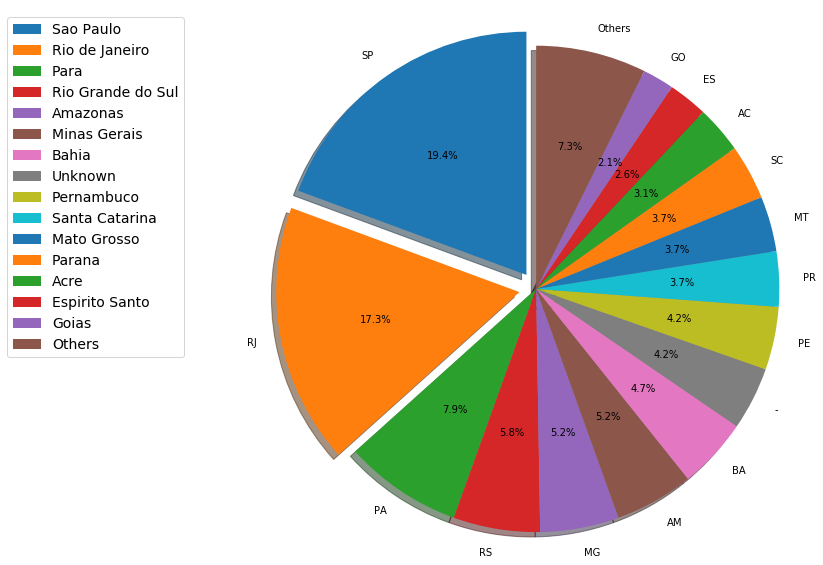

In [147]:
import matplotlib.pyplot as plt

explode = [0.07 if count > 30 else 0 for count in counts]

fig1, ax1 = plt.subplots()
fig1.set_size_inches(10,10)
ax1.pie(counts, explode=explode, labels=acronyms, shadow=True, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.legend(labels, bbox_to_anchor=(-0.1, 1.), fontsize=14)
plt.show()

In [143]:
# Plot a scatterplot
# import matplotlib.pyplot as plt
# import numpy as np

# plt.scatter()
# # df_crashes.Location.value_counts().index
# # ax = plt.gca()

# plt.colorbar(label="petal_length")
# plt.xlabel("sepal_width")
# plt.ylabel("sepal_length")
# plt.show()

In [144]:
# Plot the crashes by airline

In [145]:
# Show the cause of each crash